# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [45]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [46]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [48]:
movie_data = pd.DataFrame(data)
movie_data.isna().values.sum()

0

In [49]:
duplicated_rows = movie_data[movie_data.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(0, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [50]:
movie_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [51]:
movie_data.USD_Production_Budget = movie_data.USD_Production_Budget.astype(str).str.replace(',','')
movie_data.USD_Production_Budget = movie_data.USD_Production_Budget.astype(str).str.replace('$','')
movie_data.USD_Production_Budget = pd.to_numeric(movie_data.USD_Production_Budget)
movie_data.USD_Production_Budget

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5391, dtype: int64

In [52]:
movie_data.USD_Worldwide_Gross = movie_data.USD_Worldwide_Gross.astype(str).str.replace(',','')
movie_data.USD_Worldwide_Gross = movie_data.USD_Worldwide_Gross.astype(str).str.replace('$','')
movie_data.USD_Worldwide_Gross = pd.to_numeric(movie_data.USD_Worldwide_Gross)
movie_data.USD_Worldwide_Gross

0       11000000
1              0
2        8000000
3        3000000
4       22000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Worldwide_Gross, Length: 5391, dtype: int64

In [53]:
movie_data.USD_Domestic_Gross = movie_data.USD_Domestic_Gross.astype(str).str.replace(',','')
movie_data.USD_Domestic_Gross = movie_data.USD_Domestic_Gross.astype(str).str.replace('$','')
movie_data.USD_Domestic_Gross = pd.to_numeric(movie_data.USD_Domestic_Gross)
movie_data.USD_Domestic_Gross

0       10000000
1              0
2        8000000
3        3000000
4       11000000
          ...   
5386           0
5387           0
5388           0
5389           0
5390           0
Name: USD_Domestic_Gross, Length: 5391, dtype: int64

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [54]:
movie_data.Release_Date = pd.to_datetime(movie_data.Release_Date)
movie_data.Release_Date.head()

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [55]:
movie_data.USD_Production_Budget.mean()

31113737.57837136

In [56]:
movie_data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [57]:
movie_data['Worldwide_Revenue'] = movie_data.USD_Worldwide_Gross.subtract(movie_data.USD_Production_Budget)
print(movie_data.Worldwide_Revenue.min())
movie_data.Worldwide_Revenue.mean()

-175000000


57741684.38434428

In [58]:
movie_data['Domestic_Revenue'] = movie_data.USD_Domestic_Gross.subtract(movie_data.USD_Production_Budget)
print(movie_data.Domestic_Revenue.min())
movie_data.Domestic_Revenue.mean()

-201941321


10121781.864774624

In [59]:
movie_data.loc[movie_data[movie_data['Domestic_Revenue'] == movie_data.Domestic_Revenue.min()].index.values]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
4223,7,2012-09-03,John Carter,275000000,282778100,73058679,7778100,-201941321


In [60]:
print(movie_data.Worldwide_Revenue.sort_values().head(1347).mean())
movie_data.Worldwide_Revenue.sort_values().tail(1347).mean()

-14407299.624350408


216504212.4780995

In [61]:
movie_data.loc[movie_data[movie_data['Worldwide_Revenue'] == movie_data.Worldwide_Revenue.max()].index.values]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982,335507625


In [62]:
movie_data.loc[movie_data[movie_data['USD_Production_Budget'] == movie_data.USD_Production_Budget.max()].index.values]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625,2358918982,335507625


In [63]:
movie_data.loc[movie_data[movie_data['USD_Production_Budget'] == movie_data.USD_Production_Budget.min()].index.values]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,179941,179941


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [64]:
movie_data[movie_data['USD_Domestic_Gross'] == 0].sort_values(by='USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-1400
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,-5000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,-10000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,-12000
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-15000
...,...,...,...,...,...,...,...,...
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0,-75452340,-80000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-100000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-103000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-160000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [65]:
movie_data[movie_data['USD_Worldwide_Gross'] == 0].sort_values(by='USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-1400
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000,-5000
4907,5381,2015-05-19,Family Motocross,10000,0,0,-10000,-10000
3056,5374,2007-12-31,Tin Can Man,12000,0,0,-12000,-12000
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0,-15000,-15000
...,...,...,...,...,...,...,...,...
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0,-60000000,-60000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000,-100000000
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000,-103000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000,-160000000


### Filtering on Multiple Conditions

In [66]:
international_releases = movie_data.loc[(movie_data.USD_Domestic_Gross == 0) & (movie_data.USD_Worldwide_Gross != 0)]
international_releases.sort_values(by='USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
4796,5359,2015-01-09,Backmask,25000,428923,0,403923,-25000
4072,5319,2011-12-31,Absentia,70000,8555,0,-61445,-70000
4535,5276,2013-12-31,Speak No Evil,150000,32927,0,-117073,-150000
5113,5267,2015-12-31,Lumea e a mea,168000,29827,0,-138173,-168000
4862,5206,2015-03-24,Along the Roadside,250000,3234,0,-246766,-250000
...,...,...,...,...,...,...,...,...
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,42000000,83833602,0,41833602,-42000000
5091,1271,2015-12-31,Pourquoi j'ai pas mangé mon père,42000000,182156,0,-41817844,-42000000
4295,1230,2012-12-31,Foodfight!,45000000,73706,0,-44926294,-45000000
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0,-16919875,-77600000


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [67]:
international_releases2 = movie_data.query('USD_Domestic_Gross == 0 & USD_Worldwide_Gross != 0')
international_releases2

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780,-3380000
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110,-500000
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406,-7500000
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820,-4000000
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258,-20000000
...,...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911,-36000000
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172,-23000000
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439,-1100000
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527,-30000000


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [68]:
# Date of Data Collection
scrape_date = pd.Timestamp(year=2018, month=5, day=1)
scrape_date1 = scrape_date.strftime('%Y-%m-%d')
scrape_date1

'2018-05-01'

In [69]:
unreleased_films = movie_data.loc[(movie_data.Release_Date >= scrape_date1)]
unreleased_films
clean_data = movie_data.drop(unreleased_films.index)
clean_data.loc[(clean_data.Release_Date >= scrape_date1)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [70]:
print(clean_data.shape)
money_losing = clean_data.loc[(movie_data.Worldwide_Revenue <= 0)]
len(money_losing)/len(clean_data)*100


(5384, 8)


37.27711738484398

# Seaborn for Data Viz: Bubble Charts

<function matplotlib.pyplot.show>

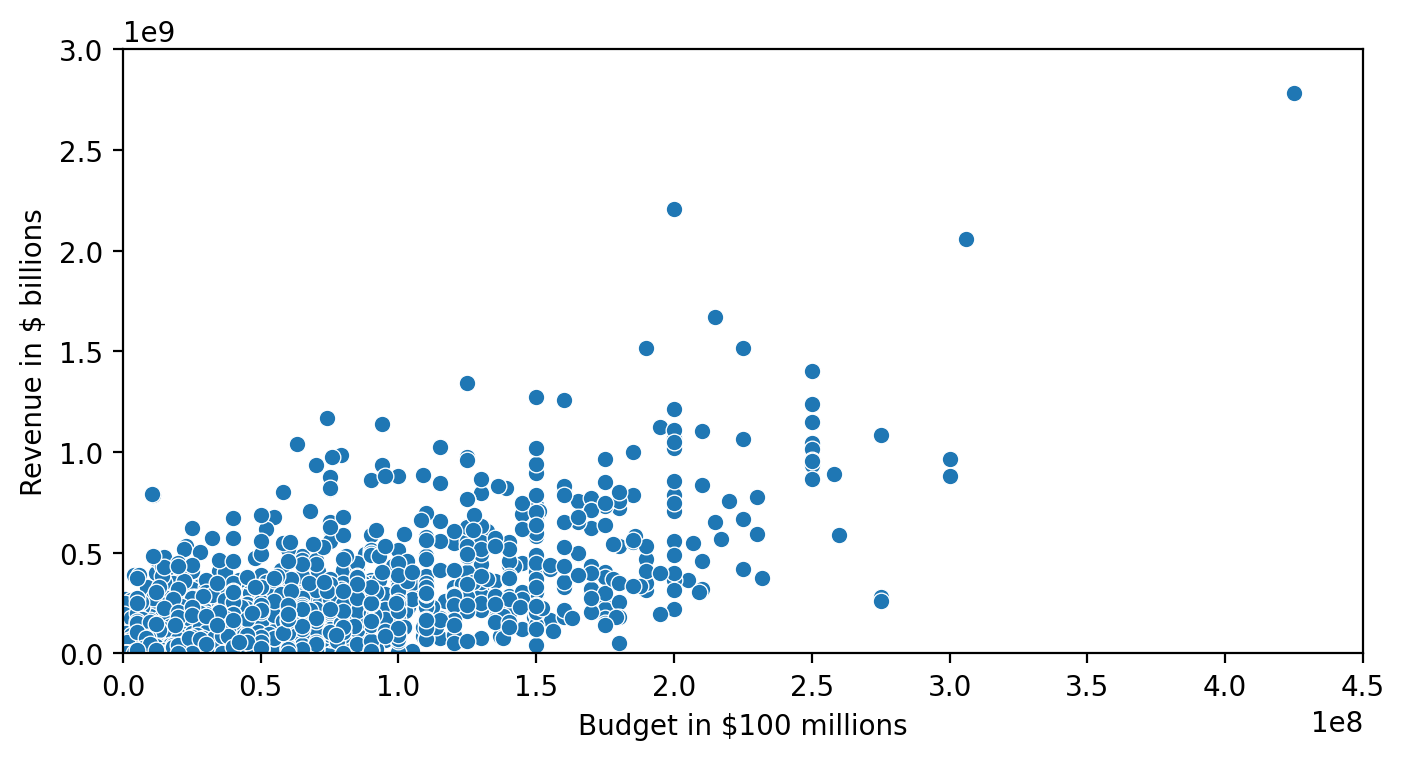

In [71]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=clean_data,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show

<function matplotlib.pyplot.show>

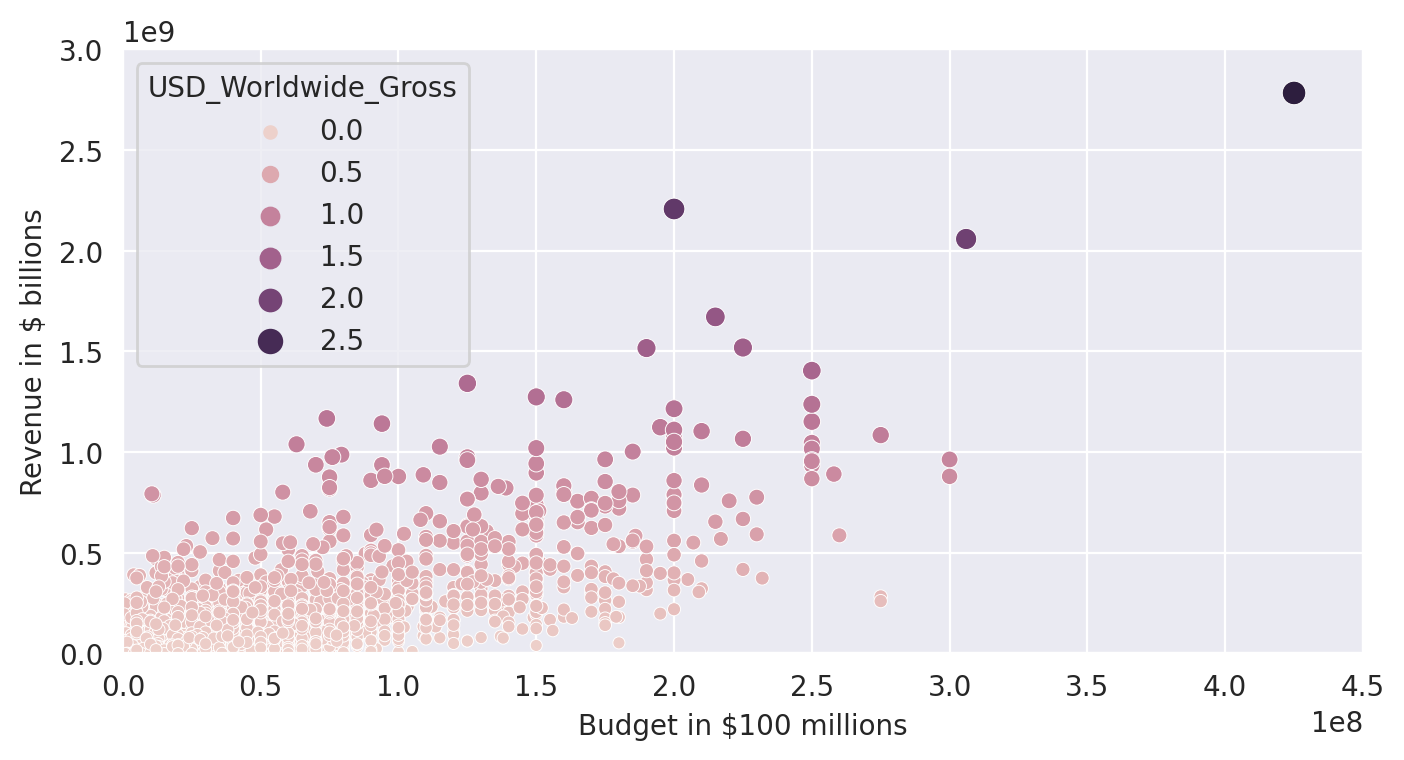

In [72]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                      x='USD_Production_Budget', 
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



<function matplotlib.pyplot.show>

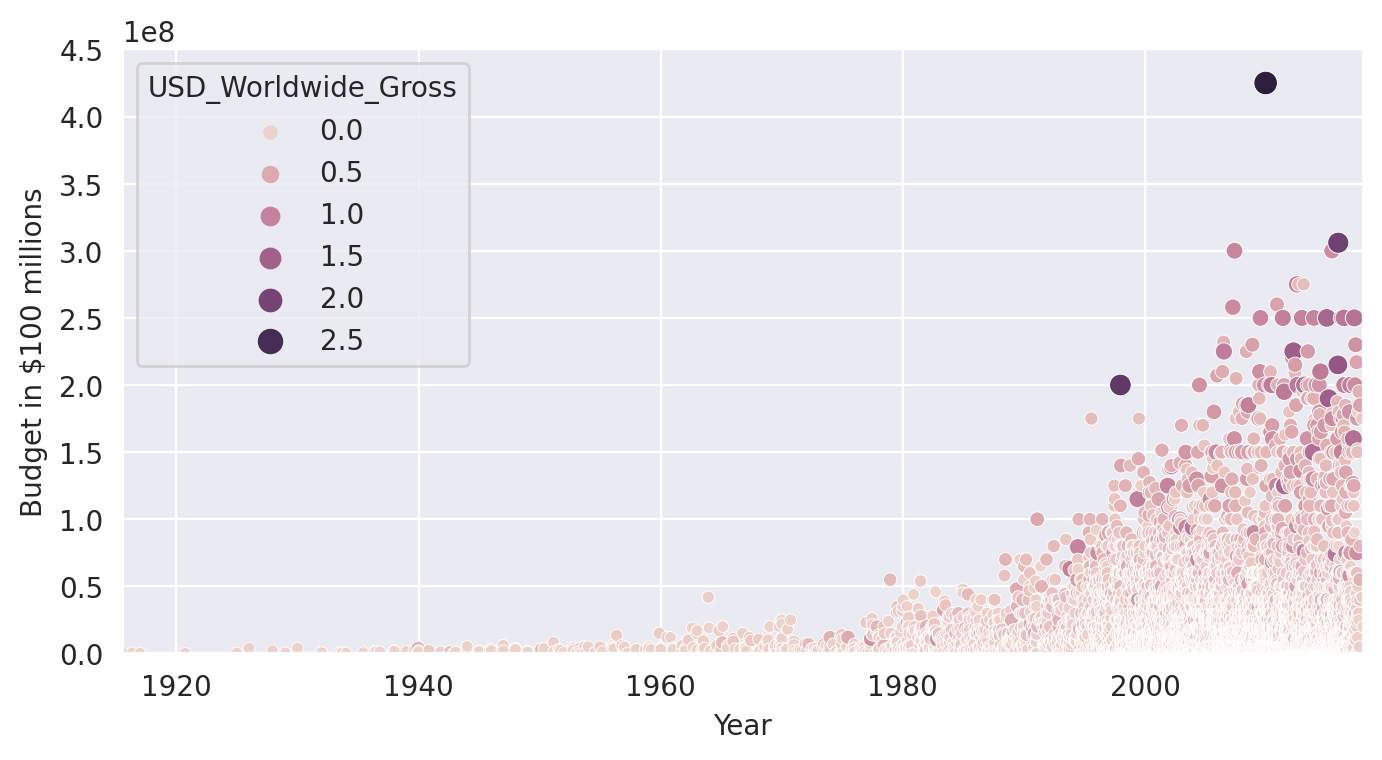

In [73]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=clean_data,
                      x='Release_Date', 
                      y='USD_Production_Budget',
                      hue='USD_Worldwide_Gross', # colour
                      size='USD_Worldwide_Gross',) # dot size
  ax.set(ylim=(0, 450000000),
        xlim=(clean_data.Release_Date.min(),clean_data.Release_Date.max() ),
        ylabel='Budget in $100 millions',
        xlabel='Year')
plt.show

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [86]:
from pandas.core.indexes.datetimes import DatetimeIndex
year = DatetimeIndex(data=clean_data.Release_Date)
clean_data['Decade'] = year.year//10*10
clean_data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,9890000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,-385907,-385907,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,7800000,7800000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,2900000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,21755000,10755000,1920
...,...,...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,126893990,52029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,376137727,-16947188,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,-34987392,-135824934,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,15850343,3850343,2010


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [97]:
old_films = clean_data.query('Decade < 1970')
old_films.describe()
old_films.sort_values(by='USD_Production_Budget')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue,Decade
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,2900000,2900000,1920
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,10890000,9890000,1910
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,29886000,11886000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,7866000,3866000,1940
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,24800000,13300000,1960
...,...,...,...,...,...,...,...,...,...
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,-12000000,-12000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,11678778,11678778,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,-4526667,-4526667,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,9208099,9208099,1960


In [99]:
new_films = clean_data.query('Decade >= 1970')
print(new_films)
new_films.describe()

      Rank Release_Date  ... Domestic_Revenue  Decade
153   2159   1970-01-01  ...        -25000000    1970
154   2270   1970-01-01  ...        -17000000    1970
155   3136   1970-01-01  ...         50500000    1970
156   3277   1970-01-01  ...         -8800000    1970
157   4265   1970-01-01  ...         78100000    1970
...    ...          ...  ...              ...     ...
5379  1295   2017-10-02  ...         52029184    2010
5380    70   2017-10-03  ...        -16947188    2010
5381    94   2017-12-05  ...       -135824934    2010
5382  1254   2017-12-05  ...          3850343    2010
5383  2521   2017-12-31  ...        -20000000    2010

[5231 rows x 9 columns]


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Worldwide_Revenue,Domestic_Revenue,Decade
count,"5,231.00","5,231.00","5,231.00","5,231.00","5,231.00","5,231.00","5,231.00"
mean,"2,652.00","31,811,437.73","90,683,497.56","41,841,922.35","58,872,059.83","10,030,484.62","2,000.19"
std,"1,549.33","40,758,580.67","170,424,978.36","66,702,734.68","142,586,941.57","48,718,769.82",9.58
min,1.00,"1,100.00",0.00,0.00,"-127,426,868.00","-201,941,321.00","1,970.00"
25%,"1,314.50","5,000,000.00","3,831,677.00","1,252,581.00","-2,386,213.50","-9,569,746.50","2,000.00"
50%,"2,629.00","18,000,000.00","28,544,120.00","17,510,118.00","8,322,573.00","-487,768.00","2,000.00"
75%,"3,967.50","40,000,000.00","98,777,000.00","53,301,583.00","61,453,613.50","17,547,263.50","2,010.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00","2,358,918,982.00","630,662,225.00","2,010.00"


# Seaborn Regression Plots

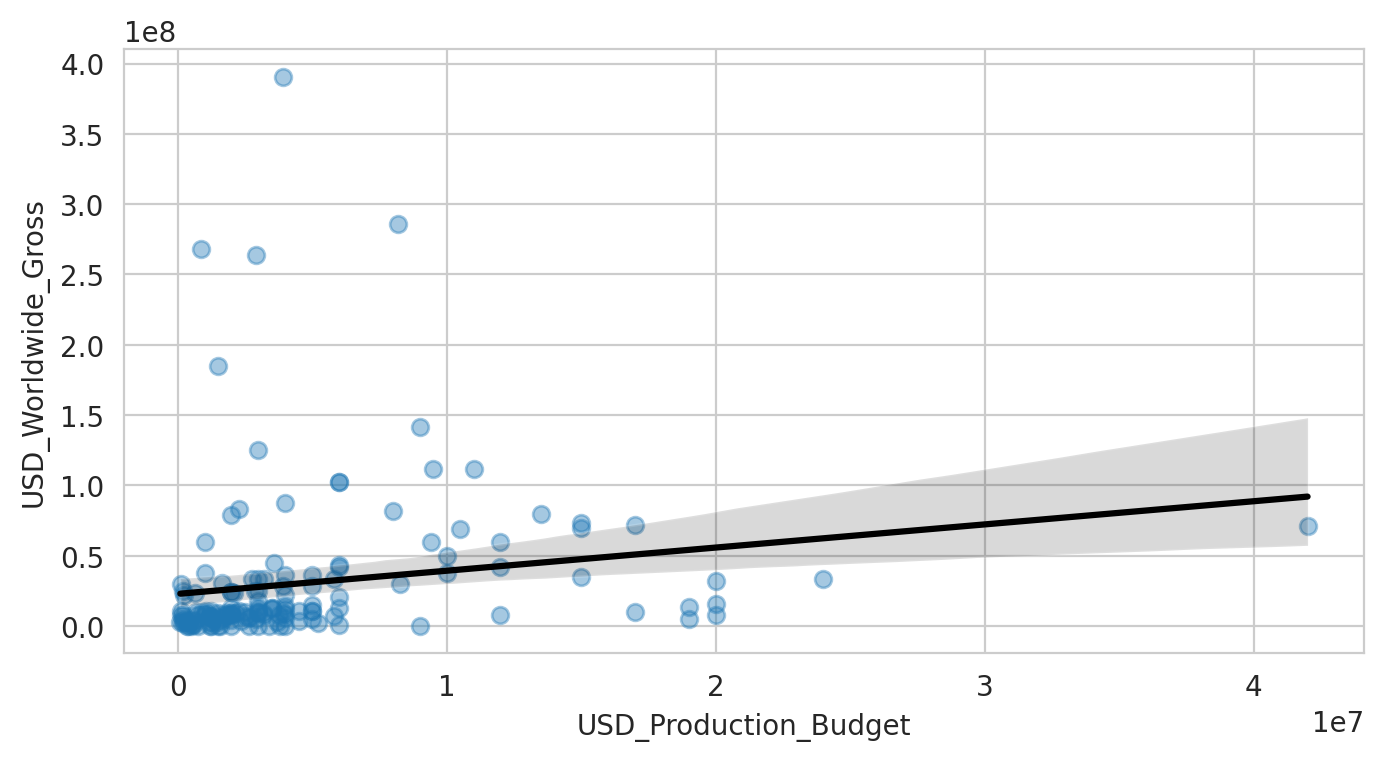

In [95]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

<function matplotlib.pyplot.show>

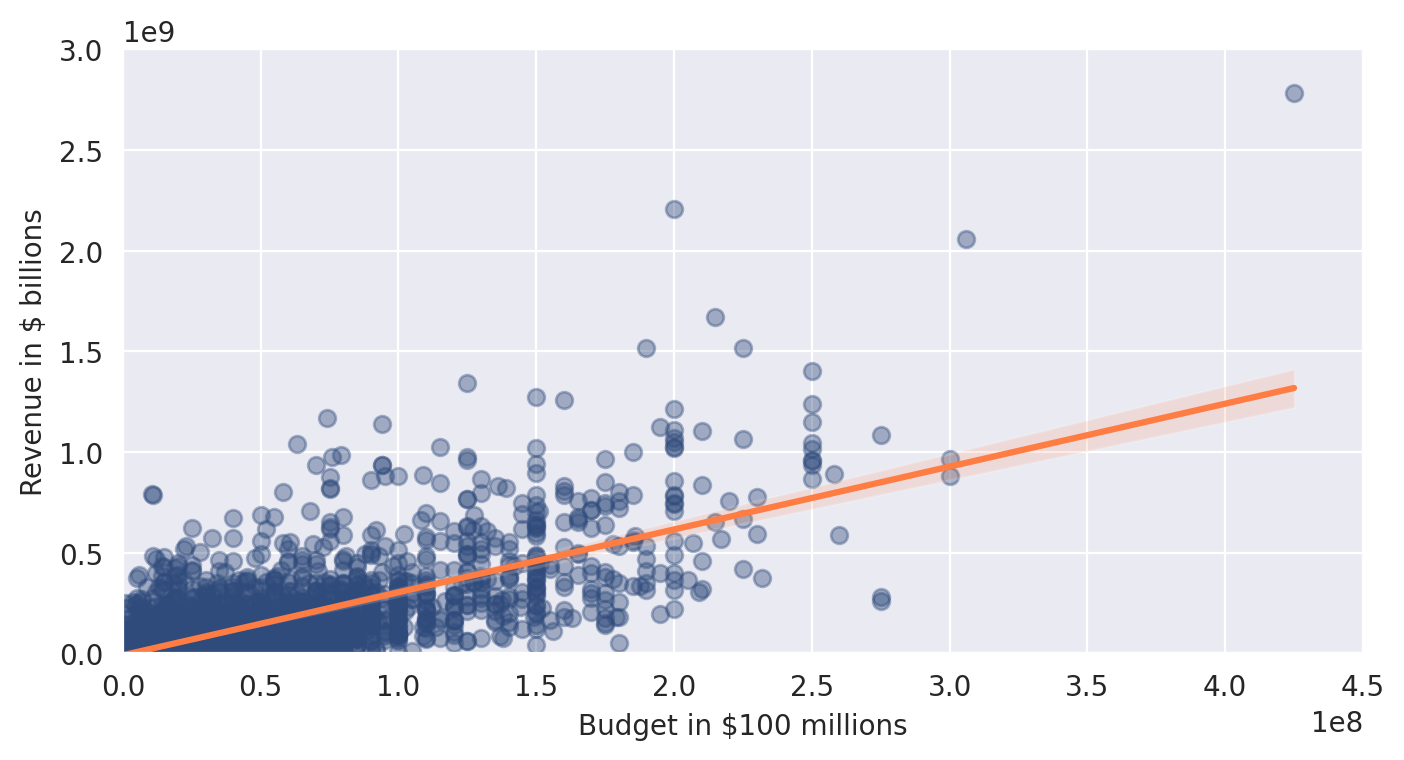

In [115]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'color': '#2f4b7c','alpha':0.4},
            line_kws = {'color': '#ff7c43'})
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [134]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'intercept {regression.intercept_}')
print(f'slope {regression.coef_}')
print(f'r-squared {regression.score(X, y)}')

intercept [-8650768.00661027]
slope [[3.12259592]]
r-squared 0.5577032617720403


**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [129]:
s = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
d = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

In [136]:
regression1 = LinearRegression()
regression1.fit(s, d)
print(f'intercept {regression1.intercept_}')
print(f'slope {regression1.coef_}')
print(f'r-squared {regression1.score(s, d)}')

intercept [22821538.63508039]
slope [[1.64771314]]
r-squared 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [140]:
regression1.intercept_ + regression1.coef_ * 350000000

array([[5.99521139e+08]])

In [144]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.100}.')

The estimated revenue for a $350 film is around $1084000000.0.
